In [1]:
import numpy as np
import pandas as pd
import os
import random
from itertools import product 
from itertools import permutations 
from itertools import combinations

from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm 
import scipy.stats as stats
%matplotlib inline

from tqdm.notebook import tqdm

from sklearn.model_selection import train_test_split

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx

from google.colab import drive

In [2]:
path1='/content/drive/MyDrive/LG/'

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


# 한글폰트 설치

In [4]:
#나눔폰트 설치되있는지 확인
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 17
['/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/li

In [5]:
#나눔폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 155013 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [6]:
#나눔폰트가 잘 설치됐는지 확인
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [7]:
#나눔폰트 경로 확인
nanum_font

['/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/

In [8]:
#파이썬 버전과 현재 설정되어있는 폰트 확인
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}") 
        
current_font()

Python 3.7.12
설정 폰트 글꼴: ['sans-serif'], 설정 폰트 사이즈: 10.0


In [9]:
#폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'  
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumBarunGothic


In [10]:
fm._rebuild()

In [15]:
data=pd.read_csv(path1+'Oven_sample.csv',encoding='cp949')
data.head()

,CREATE_DT,LOCAL_TIME,DEVICE_ID,EVENT,Cook_State,Cook_Mode,Cook_menu,Cook_hour,Cook_min,Cook_sec,Target_temp,MONTH
0,2019-11-20 23:43:56,2019-11-21 08:43:56,id_00000,요리재시작,요리,오븐 자동,군고구마,0,28,38,0,2019-11
1,2019-11-30 10:50:26,2019-11-30 19:50:26,id_00000,요리시작,요리,레인지,0,0,0,30,0,2019-11
2,2019-11-30 10:53:51,2019-11-30 19:53:51,id_00000,요리취소,대기,대기,0,0,0,0,0,2019-11
3,2019-11-30 10:50:45,2019-11-30 19:50:45,id_00000,요리멈춤,요리멈춤,레인지,0,0,2,42,0,2019-11
4,2019-11-30 10:53:49,2019-11-30 19:53:49,id_00000,요리멈춤,요리멈춤,레인지,0,0,0,31,0,2019-11


# visualizing frequent-items (menus)

## 1-1. preprocessing

In [16]:
#요리 메뉴 전처리
data=data[~data['Cook_menu'].isin(['0','My_Recipe','스팀발생기세정','스팀청소','요리취소','잔수제거','조리실건조','탈취','해동'])].reset_index(drop=True)

In [17]:
#날 별로 분석하기 위해 day변수 생성
data['day']=pd.Series()

for i in tqdm(range(len(data))):
    data.loc[i,'day'] = str(data.loc[i,'LOCAL_TIME'])[:10]
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


  0%|          | 0/24904 [00:00<?, ?it/s]

,CREATE_DT,LOCAL_TIME,DEVICE_ID,EVENT,Cook_State,Cook_Mode,Cook_menu,Cook_hour,Cook_min,Cook_sec,Target_temp,MONTH,day
0,2019-11-20 23:43:56,2019-11-21 08:43:56,id_00000,요리재시작,요리,오븐 자동,군고구마,0,28,38,0,2019-11,2019-11-21
1,2019-11-29 15:40:11,2019-11-30 00:40:11,id_00000,요리멈춤,요리멈춤,오븐 자동,군고구마,0,4,31,0,2019-11,2019-11-30
2,2019-11-29 15:13:12,2019-11-30 00:13:12,id_00000,요리시작,요리,오븐 자동,군고구마,0,31,30,0,2019-11,2019-11-30
3,2019-11-20 23:26:07,2019-11-21 08:26:07,id_00000,요리시작,요리,오븐 자동,군고구마,0,34,0,0,2019-11,2019-11-21
4,2019-11-20 23:37:36,2019-11-21 08:37:36,id_00000,요리시작,요리,오븐 자동,군고구마,0,34,0,0,2019-11,2019-11-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24899,2021-03-29 11:08:34,2021-03-29 20:08:34,id_00150,요리시작,요리,구이 자동,삼치구이,0,18,0,0,2021-03,2021-03-29
24900,2021-04-19 10:46:48,2021-04-19 19:46:48,id_00150,요리시작,요리,최근사용메뉴,갈치구이,0,15,0,0,2021-04,2021-04-19
24901,2021-04-19 10:56:06,2021-04-19 19:56:06,id_00150,요리멈춤,요리멈춤,최근사용메뉴,갈치구이,0,5,45,0,2021-04,2021-04-19
24902,2021-04-19 10:54:12,2021-04-19 19:54:12,id_00150,요리멈춤,요리멈춤,최근사용메뉴,갈치구이,0,7,37,0,2021-04,2021-04-19


In [18]:
data=data[['day','DEVICE_ID','Cook_menu']]

In [19]:
#column은 unique한 menu, row는 day인 데이터프레임 생성
df=pd.DataFrame(index=np.unique(data['day']),columns=np.unique(data['Cook_menu']))

In [20]:
#apriori 알고리즘에 들어가는 데이터프레임 생성
for day in tqdm(df.index):
  df_day=data[data['day']==day].reset_index(drop=True)
  unique_menu=np.unique(df_day['Cook_menu'])

  for menu in df.columns:        
    if menu in unique_menu:
      df.loc[day,menu]=1
    else:
      df.loc[day,menu]=0

  0%|          | 0/578 [00:00<?, ?it/s]

## 1-2. 최소지지도 0.01로 설정

In [21]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

In [22]:
frequent_itemsets['length']=frequent_itemsets.itemsets.apply(lambda x: len(x))

In [24]:
frequent_itemsets

,support,itemsets,length
0,0.16263,(가래떡구이),1
1,0.0103806,(가자미),1
2,0.0986159,(가자미오븐구이),1
3,0.140138,(갈비구이),1
4,0.230104,(갈치구이),1
...,...,...,...
65950,0.0121107,"(고등어구이, 냉동너겟, 냉동군만두, 냉동돈가스, 냉동피자, 냉장밥데우기, 베이글,...",10
65951,0.0103806,"(고등어구이, 냉동너겟, 우유데우기, 냉동군만두, 냉동피자, 냉장밥데우기, 베이글,...",10
65952,0.0121107,"(고등어구이, 우유데우기, 냉동군만두, 냉동돈가스, 냉동피자, 냉장밥데우기, 베이글...",10
65953,0.0138408,"(고등어구이, 우유데우기, 냉동군만두, 스테이크, 냉동돈가스, 냉동피자, 냉장밥데우...",10


## 1-3. 아이템 조합이 2,3개인 데이터 시각화

In [23]:
# 2,3개 메뉴 조합 데이터 추출
df2=frequent_itemsets[(frequent_itemsets['length']==2) | (frequent_itemsets['length']==3)].reset_index(drop=True)

In [25]:
print("아이템 길이가 2이거나 3인 data 수: ",len(df2))
print("전체 데이터 수: ",len(frequent_itemsets))

아이템 길이가 2이거나 3인 data 수:  8311
전체 데이터 수:  65955


## 1-4. visualization

In [26]:
G2=nx.Graph()
ar2=df2['itemsets']
G2.add_edges_from(ar2[:30])

In [27]:
pr2=nx.pagerank(G2)
nsize2=np.array([v for v in pr2.values()])
nsize2=2000*(nsize2-min(nsize2))/(max(nsize2)-min(nsize2))

In [28]:
pos2=nx.planar_layout(G2)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46497 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

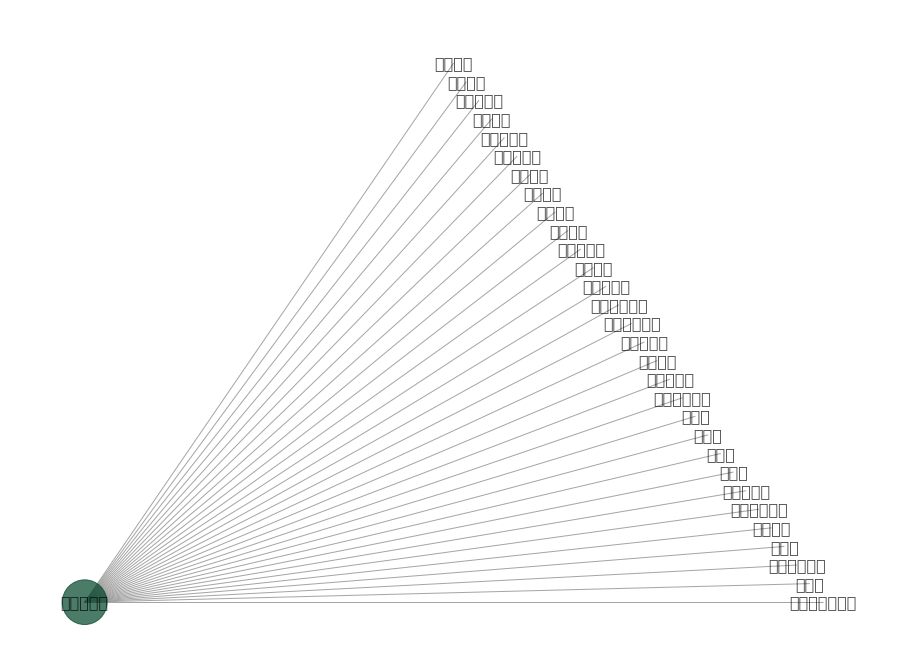

In [29]:
plt.figure(figsize=(16,12))
plt.axis('off')
nx.draw_networkx(G2,font_size=16,font_family='NanumBarunGothic',pos=pos2,node_color=list(pr2.values()),node_size=nsize2,
                 alpha=0.7,edge_color='.5',cmap=plt.cm.YlGn)

# 2. association rules

## 2-1. frequent-item sorted by support

In [ ]:
frequent_itemsets.sort_values(by='support',ascending=False).head(20)

,support,itemsets,length
18,0.908304,(냉동밥데우기),1
12,0.847751,(군고구마),1
57,0.833910,(식빵),1
550,0.778547,"(군고구마, 냉동밥데우기)",2
867,0.756055,"(냉동밥데우기, 식빵)",2
587,0.705882,"(군고구마, 식빵)",2
24,0.686851,(냉장밥데우기),1
4740,0.650519,"(군고구마, 냉동밥데우기, 식빵)",3
835,0.638408,"(냉장밥데우기, 냉동밥데우기)",2
556,0.602076,"(냉장밥데우기, 군고구마)",2


## 2-2. association rules (confidence >=0.3, sorted by confidence, support, lift)

In [ ]:
df_con=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3).sort_values(by=['confidence','support','lift'],ascending=False)
df_con.head(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3360,"(감자삶기, 냉장밥데우기)",(냉동밥데우기),0.128028,0.908304,0.128028,1.0,1.100952,0.011740,inf
29315,"(감자삶기, 군고구마, 냉장밥데우기)",(냉동밥데우기),0.115917,0.908304,0.115917,1.0,1.100952,0.010629,inf
30972,"(감자삶기, 식빵, 냉장밥데우기)",(냉동밥데우기),0.105536,0.908304,0.105536,1.0,1.100952,0.009677,inf
130383,"(감자삶기, 군고구마, 식빵, 냉장밥데우기)",(냉동밥데우기),0.096886,0.908304,0.096886,1.0,1.100952,0.008884,inf
197589,"(냉장밥데우기, 냉동피자, 우유데우기, 냉동군만두)",(군고구마),0.095156,0.847751,0.095156,1.0,1.179592,0.014487,inf
7894,"(식빵, 찐빵)",(군고구마),0.091696,0.847751,0.091696,1.0,1.179592,0.013961,inf
3355,"(감자삶기, 냉동피자)",(냉동밥데우기),0.089965,0.908304,0.089965,1.0,1.100952,0.008249,inf
34147,"(고등어구이, 우유데우기, 냉동군만두)",(군고구마),0.086505,0.847751,0.086505,1.0,1.179592,0.013170,inf
57345,"(냉동밥데우기, 찐빵, 식빵)",(군고구마),0.086505,0.847751,0.086505,1.0,1.179592,0.013170,inf
5766,"(냉동돈가스, 국데우기)",(냉동밥데우기),0.086505,0.908304,0.086505,1.0,1.100952,0.007932,inf


## 2-3. association rules sorted by lift

In [ ]:
association_rules(frequent_itemsets, metric="lift", min_threshold=1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(가래떡구이),(갈치구이),0.162630,0.230104,0.041522,0.255319,1.109582,0.004101,1.033861
1,(갈치구이),(가래떡구이),0.230104,0.162630,0.041522,0.180451,1.109582,0.004101,1.021745
2,(감자그라탱),(가래떡구이),0.043253,0.162630,0.010381,0.240000,1.475745,0.003346,1.101803
3,(가래떡구이),(감자그라탱),0.162630,0.043253,0.010381,0.063830,1.475745,0.003346,1.021980
4,(감자삶기),(가래떡구이),0.178201,0.162630,0.036332,0.203883,1.253667,0.007351,1.051819
...,...,...,...,...,...,...,...,...,...
2523465,(냉동피자),"(냉동너겟, 식빵, 냉동밥데우기, 냉동돈가스, 냉동군만두, 냉장밥데우기, 베이글, ...",0.524221,0.012111,0.010381,0.019802,1.635078,0.004032,1.007847
2523466,(냉장밥데우기),"(냉동너겟, 식빵, 냉동밥데우기, 냉동돈가스, 냉동군만두, 냉동피자, 베이글, 군고...",0.686851,0.012111,0.010381,0.015113,1.247931,0.002062,1.003049
2523467,(베이글),"(냉동너겟, 식빵, 냉동밥데우기, 냉동돈가스, 냉동군만두, 냉동피자, 냉장밥데우기,...",0.543253,0.017301,0.010381,0.019108,1.104459,0.000982,1.001842
2523468,(군고구마),"(냉동너겟, 식빵, 냉동밥데우기, 냉동돈가스, 냉동군만두, 냉동피자, 냉장밥데우기,...",0.847751,0.010381,0.010381,0.012245,1.179592,0.001580,1.001887
